# Programming IBM Superconducting Qubits with Qiskit  (Part 2/2)

# It from a QUBIT

## Rudy Raymond H.P. (Doctor of Informatics, Kyoto University)

## IBM Research 

Please visit www.qiskit.org for more details on an open source quantum computing framework for writing quantum experiments, programs, and applications.

In [1]:
import slides

Hello Taiwan, Hello NTU, Hello IBM QuaNTUm ... 


In [2]:
slides.ntu()

In [3]:
slides.superposition()

In [4]:
slides.bit_vs_qubit()

In [17]:
# useful math functions
from math import pi

# importing the QISKit
from qiskit import BasicAer as Aer
from qiskit import IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector

# useful additional packages 
from qiskit.tools.jupyter import *
from qiskit.providers.ibmq import least_busy

import numpy as np

def state_2_rho(state):
    return np.outer(state, state.conj())

n = 1  # number of qubits 
q = QuantumRegister(n)
c = ClassicalRegister(n)

qc = QuantumCircuit(q, c)
#qc.iden(q[0])
#qc.x(q[0])
qc.h(q[0])
#qc.y(q[0])


# execute the quantum circuit 
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
state_superposition = job.result().get_statevector(qc)
state_superposition

array([0.70710678+0.j, 0.70710678+0.j])

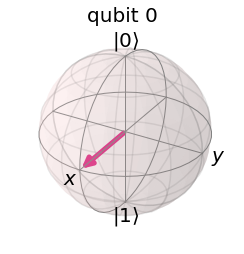

In [20]:
rho = state_2_rho(state_superposition)
plot_bloch_multivector(rho)

In [21]:
#We follow an example of using superposition of one qubit from the following tutorial
#https://github.com/Qiskit/qiskit-tutorial/blob/master/community/terra/qis_adv/single-qubit_quantum_random_access_coding.ipynb
slides.qrac()

In [22]:
IBMQ.load_accounts()

## Encoding 2 bits into 1 qubit with $(2,1)$-QRAC
We follow Example 1 described in the paper [here](http://iopscience.iop.org/article/10.1088/1367-2630/8/8/129/meta). Alice encodes her $2$ bits $x_1x_2$ by preparing the following 1-qubit states $|\phi_{x_1x_2}\rangle$.

\begin{eqnarray}
|\phi_{00}\rangle &=& \cos\left(\pi/8\right)|0\rangle + \sin\left(\pi/8\right)|1\rangle\\
|\phi_{10}\rangle &=& \cos\left(3\pi/8\right)|0\rangle + \sin\left(3\pi/8\right)|1\rangle\\
|\phi_{11}\rangle &=& \cos\left(5\pi/8\right)|0\rangle + \sin\left(5\pi/8\right)|1\rangle\\
|\phi_{01}\rangle &=& \cos\left(7\pi/8\right)|0\rangle + \sin\left(7\pi/8\right)|1\rangle\\
\end{eqnarray}

Bob recovers his choice of bit by measuring the qubit in the following way. If he wants to recover the first bit (i.e., $x_1$), he measures the qubit in the $\left\{|0\rangle, |1\rangle\right\}$ basis, namely, he concludes $0$ if he observes $|0\rangle$, and $1$ otherwise. On the other hand, if he wants to recover the second bit (i.e., $x_2$), he measures the qubit in the $\left\{|+\rangle, |-\rangle\right\}$ basis, where $|+\rangle = 1/\sqrt{2}\left(|0\rangle + |1\rangle\right)$, and $|-\rangle = 1/\sqrt{2}\left(|0\rangle - |1\rangle\right)$. 

Below is the code to create quantum circuits for performing experiments of $(2,1)$-QRAC. Each of the circuits consits of encoding $2$ bits of information into $1$ qubit and decoding either the first or the second bit by performing measurement on the qubit. Notice that because in the IBM Q Experience we can only perform measurement in the $\left\{|0\rangle, |1\rangle\right\}$ basis, the measurement in the $\left\{|+\rangle, |-\rangle\right\}$ basis is performed by first applying the Hadamard gate. 

In [23]:
#to record the rotation number for encoding 00, 10, 11, 01
rotationNumbers = {"00":1, "10":3, "11":5, "01":7}

#We use the u3 gate as detailed here:
#https://nbviewer.jupyter.org/github/Qiskit/qiskit-tutorial/blob/master/qiskit/terra/summary_of_quantum_operations.ipynb

# Creating registers
# qubit for encoding 2 bits of information
qr = QuantumRegister(1)
# bit for recording the measurement of the qubit
cr = ClassicalRegister(1)

# dictionary for encoding circuits
encodingCircuits = {}
# Quantum circuits for encoding 00, 10, 11, 01
for bits in ("00", "01", "10", "11"):
    circuitName = "Encode"+bits
    encodingCircuits[circuitName] = QuantumCircuit(qr, cr, name=circuitName)
    encodingCircuits[circuitName].u3(rotationNumbers[bits]*pi/4.0, 0, 0, qr[0])
    encodingCircuits[circuitName].barrier()

circuitNames = []
circuits = []
for k1 in encodingCircuits.keys():
    circuitNames.append(k1)
    circuits.append(encodingCircuits[k1])

print("List of circuit names:", circuitNames) #list of circuit names

List of circuit names: ['Encode00', 'Encode01', 'Encode10', 'Encode11']


In [24]:
#ENCODING 00
qc00 = encodingCircuits["Encode00"]
job = execute(qc00, backend)
state_superposition00 = job.result().get_statevector(qc00)
state_superposition00

array([0.92387953+0.j, 0.38268343+0.j])

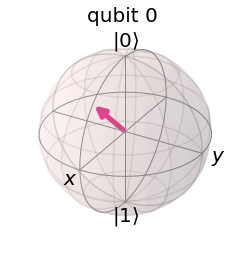

In [25]:
rho00 = state_2_rho(state_superposition00)
plot_bloch_multivector(rho00)

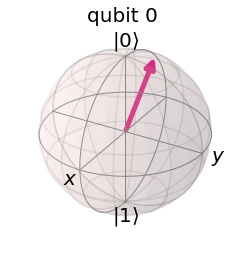

In [27]:
#ENCODING 01
qc01 = encodingCircuits["Encode01"]
job = execute(qc01, backend)
state_superposition01 = job.result().get_statevector(qc01)
rho01 = state_2_rho(state_superposition01)
plot_bloch_multivector(rho01)

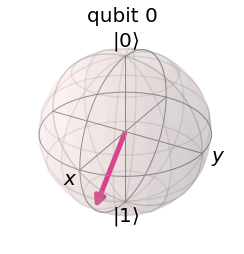

In [28]:
#ENCODING 10
qc10 = encodingCircuits["Encode10"]
job = execute(qc10, backend)
state_superposition10 = job.result().get_statevector(qc10)
rho10 = state_2_rho(state_superposition10)
plot_bloch_multivector(rho10)

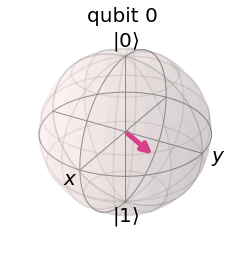

In [29]:
#ENCODING 11
qc11 = encodingCircuits["Encode11"]
job = execute(qc11, backend)
state_superposition11 = job.result().get_statevector(qc11)
rho11 = state_2_rho(state_superposition11)
plot_bloch_multivector(rho11)

## Encode and Decode
Now we can try to run the encoding and decoding to see how it performs on the simulator and real devices.

In [30]:
backend = Aer.get_backend('qasm_simulator') # the device to run on
shots = 1024    # the number of shots in the experiment 

#to record the rotation number for encoding 00, 10, 11, 01
rotationNumbers = {"00":1, "10":3, "11":5, "01":7}

# Creating registers
# qubit for encoding 2 bits of information
qr = QuantumRegister(1)
# bit for recording the measurement of the qubit
cr = ClassicalRegister(1)

# dictionary for encoding circuits
encodingCircuits = {}
# Quantum circuits for encoding 00, 10, 11, 01
for bits in ("00", "01", "10", "11"):
    circuitName = "Encode"+bits
    encodingCircuits[circuitName] = QuantumCircuit(qr, cr, name=circuitName)
    encodingCircuits[circuitName].u3(rotationNumbers[bits]*pi/4.0, 0, 0, qr[0])
    encodingCircuits[circuitName].barrier()

# dictionary for decoding circuits
decodingCircuits = {}
# Quantum circuits for decoding the first and second bit
for pos in ("First", "Second"):
    circuitName = "Decode"+pos
    decodingCircuits[circuitName] = QuantumCircuit(qr, cr, name=circuitName)
    if pos == "Second": #if pos == "First" we can directly measure
        decodingCircuits[circuitName].h(qr[0])
    decodingCircuits[circuitName].measure(qr[0], cr[0])

#combine encoding and decoding of QRACs to get a list of complete circuits
circuitNames = []
circuits = []
for k1 in encodingCircuits.keys():
    for k2 in decodingCircuits.keys():
        circuitNames.append(k1+k2)
        circuits.append(encodingCircuits[k1]+decodingCircuits[k2])

print("List of circuit names:", circuitNames) #list of circuit names

List of circuit names: ['Encode00DecodeFirst', 'Encode00DecodeSecond', 'Encode01DecodeFirst', 'Encode01DecodeSecond', 'Encode10DecodeFirst', 'Encode10DecodeSecond', 'Encode11DecodeFirst', 'Encode11DecodeSecond']


Now, we can perform various experiments of $(2,1)$-QRAC. Below, we execute all circuits of QRACs and plot some experimental results. 

Experimental Result of Encode01DecodeFirst


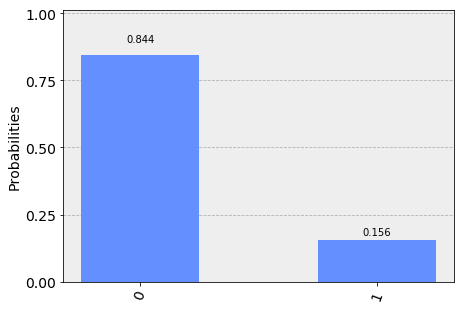

In [33]:
job = execute(circuits, backend=backend, shots=shots)
results = job.result()
print("Experimental Result of Encode01DecodeFirst")
#We should measure "0" with probability 0.85
plot_histogram(results.get_counts(circuits[circuitNames.index("Encode01DecodeFirst")]))

Experimental Result of Encode01DecodeSecond


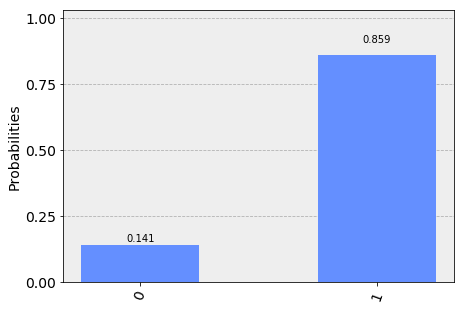

In [34]:
print("Experimental Result of Encode01DecodeSecond")
#We should measure "1" with probability 0.85
plot_histogram(results.get_counts(circuits[circuitNames.index("Encode01DecodeSecond")]))

Experimental Result of Encode11DecodeFirst


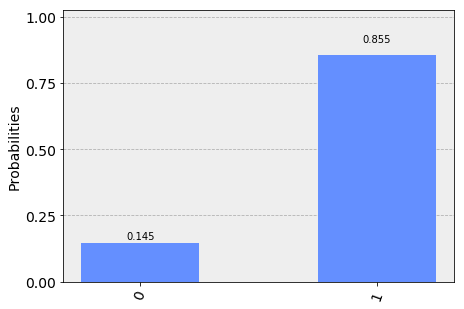

In [35]:
print("Experimental Result of Encode11DecodeFirst")
#We should measure "1" with probability 0.85
plot_histogram(results.get_counts(circuits[circuitNames.index("Encode11DecodeFirst")]))

Experimental Result of Encode11DecodeSecond


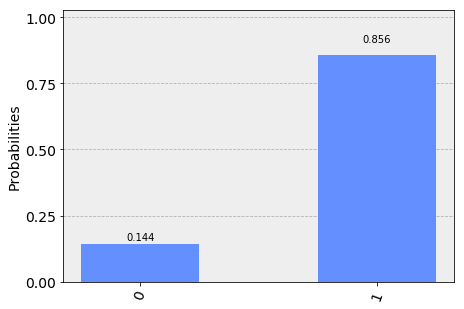

In [36]:
print("Experimental Result of Encode11DecodeSecond")
#We should measure "1" with probability 0.85
plot_histogram(results.get_counts(circuits[circuitNames.index("Encode11DecodeSecond")]))

From the above simulations, we can see that each of the encoded bits can be decoded with probability closed to the theoretical values. We can now proceed to perform experiments on the real devices or local simulator, as below. 

In [37]:
%%qiskit_job_status

# Use the IBM Quantum Experience
backend = least_busy(IBMQ.backends(simulator=False))
job = execute(circuits, backend=backend, shots=shots)

import time
lapse = 0
interval = 10
while job.status().name != 'DONE':
    print('Status @ {} seconds'.format(interval * lapse))
    print(job.status())
    print(job.queue_position())
    time.sleep(interval)
    lapse += 1
print(job.status())

Status @ 0 seconds
JobStatus.INITIALIZING
None
Status @ 10 seconds
JobStatus.QUEUED
10
Status @ 20 seconds
JobStatus.QUEUED
10
Status @ 30 seconds
JobStatus.QUEUED
10
Status @ 40 seconds
JobStatus.QUEUED
10
Status @ 50 seconds
JobStatus.QUEUED
10
Status @ 60 seconds
JobStatus.QUEUED
10
Status @ 70 seconds
JobStatus.QUEUED
10
Status @ 80 seconds
JobStatus.QUEUED
10
Status @ 90 seconds
JobStatus.QUEUED
9
Status @ 100 seconds
JobStatus.QUEUED
9
Status @ 110 seconds
JobStatus.QUEUED
8
Status @ 120 seconds
JobStatus.QUEUED
8
Status @ 130 seconds
JobStatus.QUEUED
8
Status @ 140 seconds
JobStatus.QUEUED
8
Status @ 150 seconds
JobStatus.QUEUED
8
Status @ 160 seconds
JobStatus.QUEUED
8
Status @ 170 seconds
JobStatus.QUEUED
8
Status @ 180 seconds
JobStatus.QUEUED
8
Status @ 190 seconds
JobStatus.QUEUED
8
Status @ 200 seconds
JobStatus.QUEUED
8
Status @ 210 seconds
JobStatus.QUEUED
8
Status @ 220 seconds
JobStatus.QUEUED
8
Status @ 230 seconds
JobStatus.QUEUED
7
Status @ 240 seconds
JobStatus.QUE

KeyError: 'whilejob.status().name!'

Experimental Result of Encode01DecodeFirst


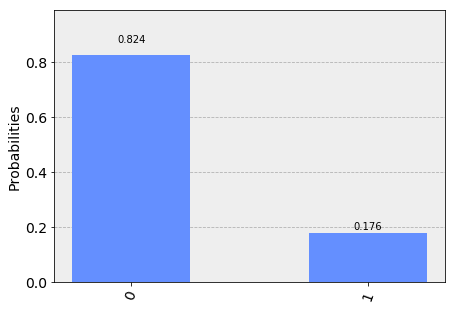

In [38]:
results = job.result()
print("Experimental Result of Encode01DecodeFirst")
#We should measure "0" with probability 0.85
plot_histogram(results.get_counts(circuits[circuitNames.index("Encode01DecodeFirst")]))

Experimental Result of Encode01DecodeSecond


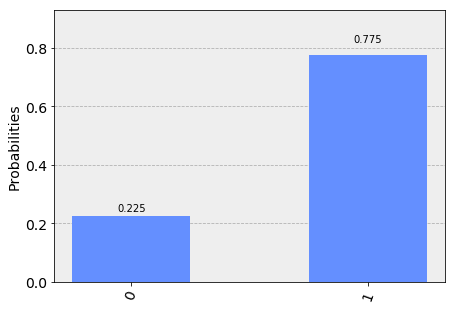

In [39]:
print("Experimental Result of Encode01DecodeSecond")
#We should measure "1" with probability 0.85
plot_histogram(results.get_counts(circuits[circuitNames.index("Encode01DecodeSecond")]))

## Other Constructions of Quantum Random Access Coding

In [40]:
slides.other_qracs()

## Encoding 3 bits into 1 qubit

See the [notebook here](https://nbviewer.jupyter.org/github/Qiskit/qiskit-tutorial/blob/master/community/terra/qis_adv/single-qubit_quantum_random_access_coding.ipynb) for codes.


## Better 2-qubit Quantum Random Access Codes

See the notebooks at [this repository](https://github.com/rraymondhp/qrac).


In [41]:
slides.thanks()